In [9]:
# LOAD DATA

#import gc
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
# from numba import cuda 

# del X_train
# del Y_train
# gc.collect()

def index_generator(num):
    if num < 10:
        return '000' + str(num)
    elif num < 100:
        return '00' + str(num)
    else:
        return '0' + str(num)

X_path = r"data\phantom_1\image_Mark_D10\ExVivo_Brain_30_A2_T2_2017-10-03_"
X_train = []

for i in range(256):
    input_path = X_path + index_generator(i) + ".oct.csv"
    B_frame = pd.read_csv(input_path).to_numpy()
    B_frame = np.resize(B_frame, (256, 256))
    #X_train = np.stack((B_frame), axis=0)
    X_train.append(B_frame)
    
X_train = np.stack(X_train, axis=0)

Y_path = r"data\phantom_1\Processed_Final_D10\ExVivo_Brain_30_A2_T2_2017-10-03_DFT_01.csv"
Y_train = pd.read_csv(Y_path).to_numpy()

print(X_train.shape)
print(Y_train.shape)

(256, 256, 256)
(256, 52)


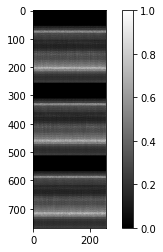

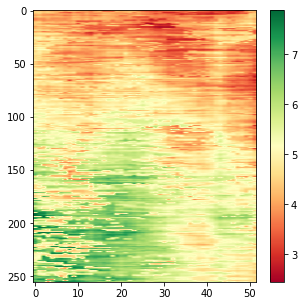

In [32]:
# VISUALIZE DATA

plt.imshow(np.reshape(X_train[0:3,:,:], (256*3,256)), cmap='gray')
plt.colorbar()
plt.show()

Y_train = np.flip(Y_train, axis=0)
plt.figure(figsize=(5,5))
plt.imshow(np.reshape(Y_train, (256,52)), aspect='auto', cmap='RdYlGn')
plt.colorbar()
plt.show()
#Y_train = Y_train[0:32,:,:]

In [24]:
# DEFINE MODEL

# device = cuda.get_current_device()
# device.reset()
# tf.keras.backend.clear_session()

inputs = tf.keras.Input(shape=(256,256,1))
c1 = tf.keras.layers.Conv2D(96, (11,11), strides=4, activation='relu', kernel_initializer='he_normal')(inputs)
p1 = tf.keras.layers.MaxPooling2D((3,3), strides=2)(c1)
c2 = tf.keras.layers.Conv2D(256, (5,5), strides=1, activation='relu', kernel_initializer='he_normal', padding='same')(p1)
p2 = tf.keras.layers.MaxPooling2D((3,3), strides=2)(c2)
c3 = tf.keras.layers.Conv2D(384, (3,3), strides=1, activation='relu', kernel_initializer='he_normal', padding='same')(p2)
c4 = tf.keras.layers.Conv2D(384, (3,3), strides=1, activation='relu', kernel_initializer='he_normal', padding='same')(c3)
c5 = tf.keras.layers.Conv2D(256, (3,3), strides=1, activation='relu', kernel_initializer='he_normal', padding='same')(c4)
p3 = tf.keras.layers.MaxPooling2D((3,3), strides=2)(c5)
f = tf.keras.layers.Flatten()(p3)
d1 = tf.keras.layers.Dense(4096, activation='relu')(f)
d2 = tf.keras.layers.Dense(2074, activation='relu')(d1)
outputs = tf.keras.layers.Dense(52, activation='relu')(d2)

model = tf.keras.Model(inputs=[inputs], outputs=[outputs])
model.compile(loss='mse', optimizer='adam')
model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 256, 256, 1)]     0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 62, 62, 96)        11712     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 30, 30, 96)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 30, 30, 256)       614656    
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 14, 14, 256)       0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 14, 14, 384)       885120    
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 14, 14, 384)       1327

In [33]:
# TRAIN MODEL

history = model.fit(x=X_train, y=Y_train, validation_split=0.1, epochs=50, batch_size=8)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

Epoch 1/50
29/29 [==============================] - 1s 18ms/step - loss: 6.7696 - val_loss: 9.4902
Epoch 2/50
29/29 [==============================] - 0s 16ms/step - loss: 6.7261 - val_loss: 9.1584
Epoch 3/50
29/29 [==============================] - 0s 17ms/step - loss: 6.6008 - val_loss: 9.8210
Epoch 4/50
29/29 [==============================] - 0s 16ms/step - loss: 6.5900 - val_loss: 9.2076
Epoch 5/50
29/29 [==============================] - 0s 16ms/step - loss: 6.5443 - val_loss: 9.5250
Epoch 6/50
29/29 [==============================] - 0s 16ms/step - loss: 6.6184 - val_loss: 8.7168
Epoch 7/50
29/29 [==============================] - 0s 16ms/step - loss: 6.5951 - val_loss: 9.4485
Epoch 8/50
29/29 [==============================] - 0s 16ms/step - loss: 6.6114 - val_loss: 9.6597
Epoch 9/50
29/29 [==============================] - 0s 16ms/step - loss: 6.5846 - val_loss: 8.9908
Epoch 10/50
29/29 [==============================] - 0s 16ms/step - loss: 6.5423 - val_loss: 8.9235
Epoch 11/

(256, 256)
[[[6.340347  6.3303347 6.251397  ... 5.424685  5.3561535 5.083436 ]]

 [[6.246181  6.2621818 6.124048  ... 5.3112636 5.2263055 4.979539 ]]

 [[6.229891  6.2407894 6.0983267 ... 5.2914543 5.207883  4.956943 ]]

 ...

 [[4.7185874 4.6282587 4.3823566 ... 3.7034514 3.584919  3.3373475]]

 [[4.73352   4.6422005 4.392963  ... 3.7078369 3.588199  3.3382697]]

 [[4.529356  4.4469657 4.2128477 ... 3.5392814 3.420401  3.184393 ]]]


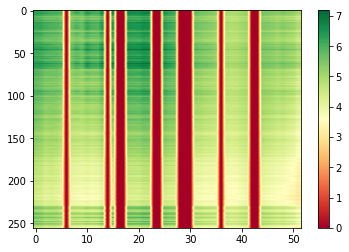

In [30]:
print(X_train[0,:,:].shape)

attenuation_map = []

for i in range(256):
    input_B_frame = np.reshape(X_train[i,:,:], (1,256,256,1))
    output_attenuation = model.predict(input_B_frame)
    attenuation_map.append(output_attenuation)

attenuation_map = np.stack(attenuation_map, axis=0)
print(attenuation_map)

plt.imshow(np.reshape(attenuation_map, (256,52)), aspect='auto', cmap='RdYlGn')
plt.colorbar()
plt.show()